# Exploratory Data Analysis & Intro

### Goal
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

### Final deliverables:
- Create Jupyter Notebooks (showcasing core skills in Python)
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & Linkedin.

### Questions to answer:
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

### Exploratory Data Analysis for all Data Roles
#### Roles to explore

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


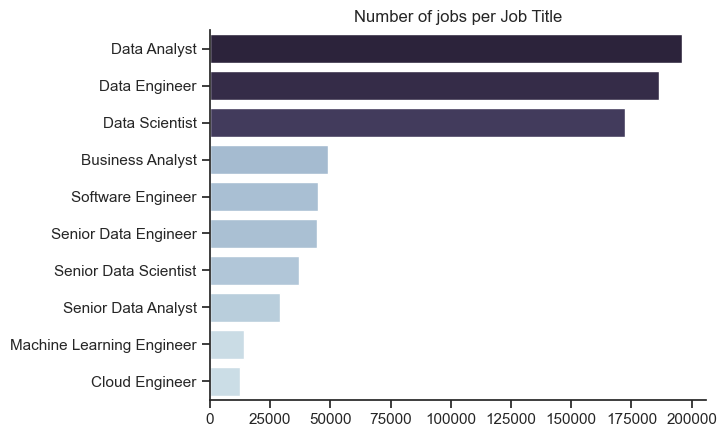

In [58]:
# Counting all job postings for top 10 roles
df_roles = df['job_title_short'].value_counts().to_frame()

# Plotting
# plt.figure(figsize=(10,6)) # Adjusting figure size (chart size)
sns.set_theme('notebook', style='ticks')
# sns.color_palette('pastel')
sns.barplot(
    data=df_roles, 
    x='count', 
    y='job_title_short', 
    hue='count', 
    palette="ch:s=.25,rot=-.25",
    # palette='dark:c_r',
    legend=False
)
sns.despine()
plt.title('Number of jobs per Job Title')
# plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Country to explore

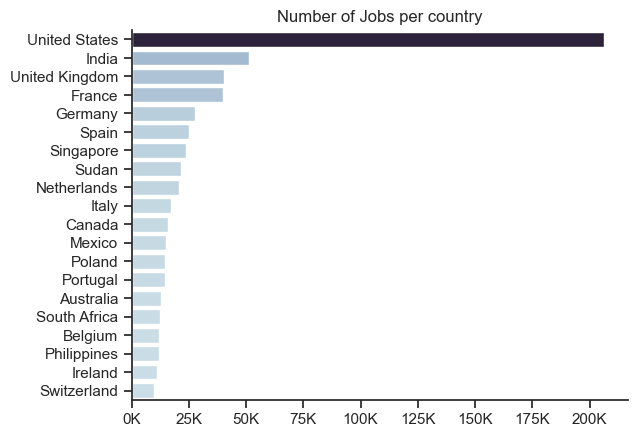

In [59]:
import matplotlib.ticker as mtick

# Countring jobs per country
df_country = df['job_country'].value_counts().head(20).to_frame()

# Plotting
# fig, ax = plt.subplots(1,1)
sns.set_theme('notebook', style='ticks')
sns.barplot(
    data=df_country, 
    x='count', 
    y='job_country', 
    hue='count', 
    palette='ch:s=.25,rot=-.25',
    # palette='dark:c_r',
    legend=False
)
sns.despine()
plt.title('Number of Jobs per country')
plt.xlabel('')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")) # format xaxis with K form (100K,200K,...)
# plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # format xaxis with comma separated (10,000, 20,000)
plt.show()

### Companies exploratory

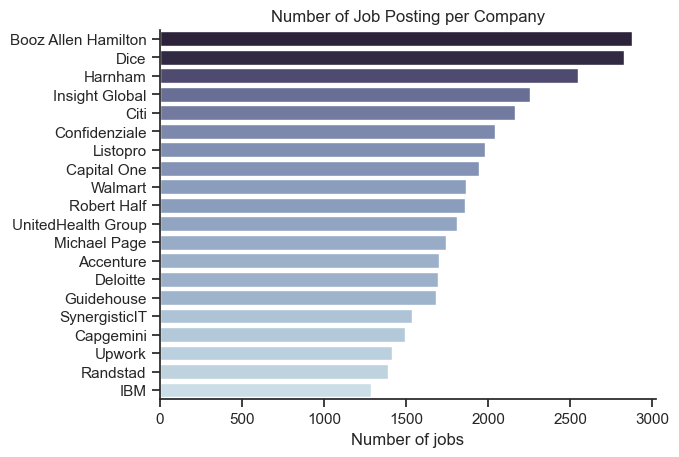

In [60]:
df_companies = df['company_name'].value_counts().to_frame()[1:].head(20)

# Plotting
sns.set_theme('notebook', style='ticks')
sns.barplot(
    data=df_companies, 
    x='count', 
    y='company_name', 
    hue='count', 
    palette='ch:s=.25,rot=-.25', 
    # palette='dark:c_r',
    legend=False
)

sns.despine()
plt.title('Number of Job Posting per Company')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

### Job opportunities

In [6]:
df_opportunities = df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]
df_opportunities

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


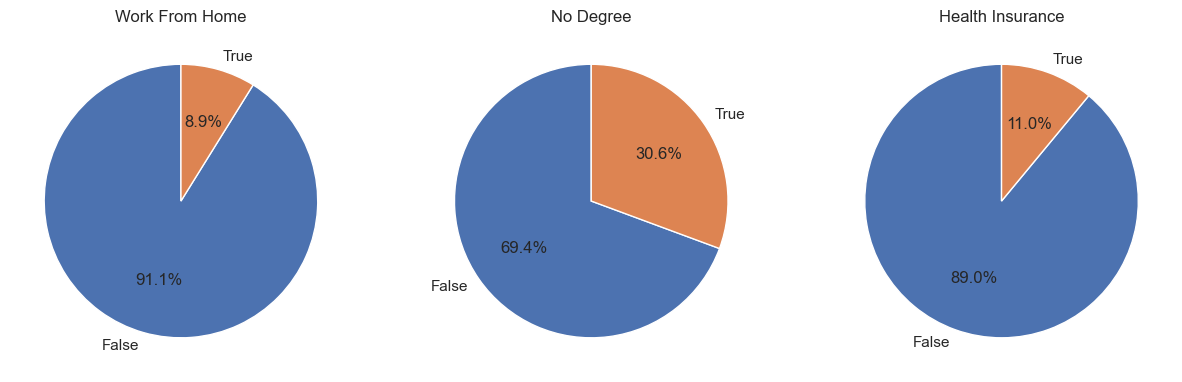

In [51]:
fig, ax = plt.subplots(1,3, figsize=(15,7))

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'No Degree',
    'job_health_insurance': 'Health Insurance'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, labels=['False', 'True'], autopct='%1.1f%%')
    ax[i].set_title(title)

plt.show()

### Exploratory Data Analysis for all Data Roles in Vietnam
#### Roles exploratory

In [8]:
df_DA_vn = df[(df['job_country'] == 'Vietnam')]
df_DA_vn

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"[sql, nosql, python, r, scala, java, rust, kot...","{'analyst_tools': ['tableau'], 'libraries': ['..."
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"[python, bash, powershell, aws, azure, git, gi...","{'cloud': ['aws', 'azure'], 'other': ['git', '..."
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"[java, hadoop, spark, unix, sap, yarn]","{'analyst_tools': ['sap'], 'libraries': ['hado..."
3056,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"[sql, python, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
3541,Data Engineer,Data Engineer,"Da Nang, Hải Châu District, Da Nang, Vietnam",via Jobs.vn.indeed.com,Full-time and Part-time,False,Vietnam,2023-11-22 13:59:18,False,False,Vietnam,None,NaN,NaN,Vinova Pte. Ltd,"[bash, python, java, sql, postgresql, mysql, e...","{'databases': ['postgresql', 'mysql', 'elastic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785253,Senior Data Analyst,Senior Data Analyst,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-11-27 06:47:04,False,False,Vietnam,None,NaN,NaN,MSC Vietnam,"[sql, java, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785380,Software Engineer,"Mlops Engineer Python, Linux","Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Trusting Social,"[python, c++, java, javascript, tensorflow, py...","{'libraries': ['tensorflow', 'pytorch', 'mxnet..."
785382,Data Analyst,Data Analyst,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:14,True,False,Vietnam,None,NaN,NaN,Sutrix Solutions,"[sql, db2, oracle, aws, jira, confluence]","{'async': ['jira', 'confluence'], 'cloud': ['o..."
785607,Cloud Engineer,Cloud Services Solutions Engineer,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-01 06:30:51,False,False,Vietnam,None,NaN,NaN,Tek Experts,"[azure, aws, oracle, windows, linux]","{'cloud': ['azure', 'aws', 'oracle'], 'os': ['..."


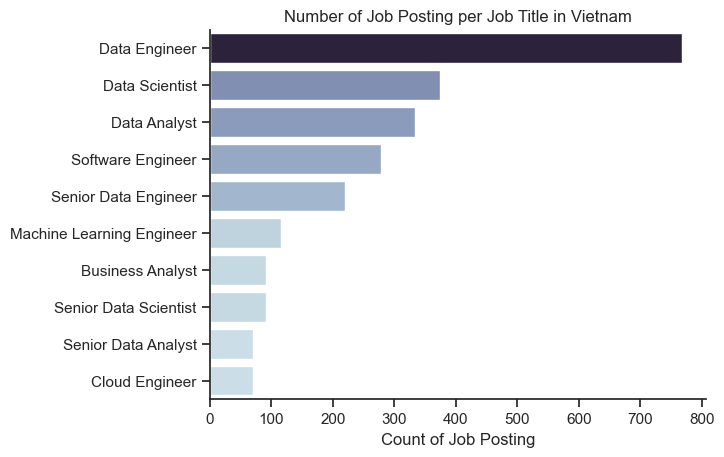

In [75]:
df_roles_vn = df_DA_vn['job_title_short'].value_counts().to_frame().head(10)

# Plotting
sns.barplot(
    data=df_roles_vn, x='count', 
    y='job_title_short', 
    hue='count', 
    palette='ch:s=.25,rot=-.25',
    # palette='dark:c_r',
    legend=False, 
)
sns.set_theme('notebook', style='ticks')
sns.despine()
plt.title('Number of Job Posting per Job Title in Vietnam')
plt.xlabel('Count of Job Posting')
plt.ylabel('')
plt.show()

### Location exploratory

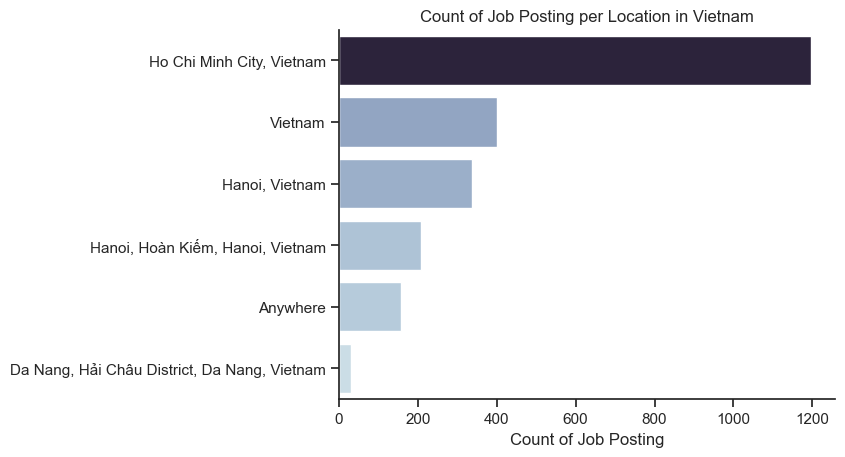

In [81]:
df_location = df_DA_vn['job_location'].value_counts().to_frame().head(6)

# Plotting
sns.barplot(
    data=df_location,
    x='count',
    y='job_location',
    hue='count',
    palette='ch:s=.25,rot=-.25',
    legend=False
)
sns.set_theme('notebook', style='ticks')
sns.despine()
plt.title('Count of Job Posting per Location in Vietnam')
plt.xlabel('Count of Job Posting')
plt.ylabel('')
plt.show()

### Job opportunities

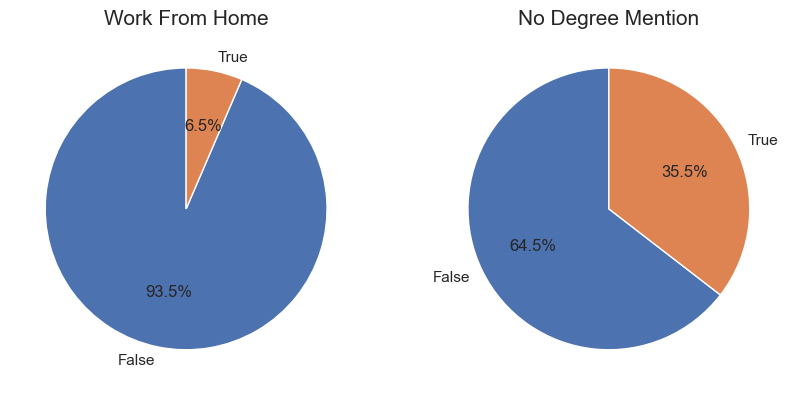

In [105]:
df_opp = df_DA_vn[['job_work_from_home','job_no_degree_mention']]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(10,5))

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'No Degree Mention'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_opp[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title, fontsize=15)